In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import datetime
import matplotlib.pyplot as plt

## 1) Feature Importance by Kfold for XGB, RF and Lasso Regression

- for three models, run over 5 kfolds

- create dictionary of union and intersection of features that each model found important

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier
from tqdm import tqdm

In [59]:
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 700, random_state=8, n_jobs=-1)
rf = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=8, n_jobs=-1)
lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)

In [57]:
from model_blender import kfold_feature_finder

In [176]:
model_dict = kfold_feature_finder('deg.csv', [rf, lasso, xgb])

100%|██████████| 3/3 [02:08<00:00, 35.57s/it]


In [177]:
model_dict.keys()

dict_keys(['RandomForestClassifier', 'LogisticRegression', 'XGBClassifier'])

In [183]:
print(f'RF # Features: {len(model_dict["RandomForestClassifier"]["Intersection"])}')

print(f'XGB # Features: {len(model_dict["XGBClassifier"]["Intersection"])}')

print(f'Lasso # Features: {len(model_dict["LogisticRegression"]["Intersection"])}')

RF # Features: 792
XGB # Features: 7
Lasso # Features: 19


In [190]:
xgb_feats = model_dict['XGBClassifier']['Intersection']
lasso_feats = model_dict['LogisticRegression']['Intersection']
len(set.intersection(xgb_feats, lasso_feats))

1

In [189]:
xgb_feats_union = model_dict['XGBClassifier']['Union']
lasso_feats_union= model_dict['LogisticRegression']['Union']
len(set.intersection(xgb_feats_union, lasso_feats_union))

126

### 

In [27]:
from data_viz import histogram_plot

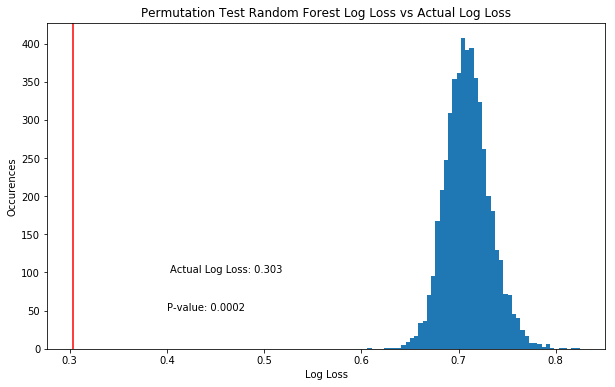

In [28]:
histogram_plot('rf_permutation_test.csv', 'Random Forest', 'log loss')

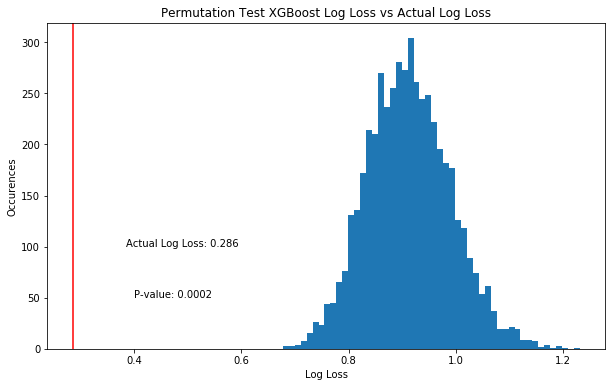

In [29]:
histogram_plot('xgb_permutation_test.csv', 'XGBoost', 'log loss')

why is XGB log loss so much worse when randomized?

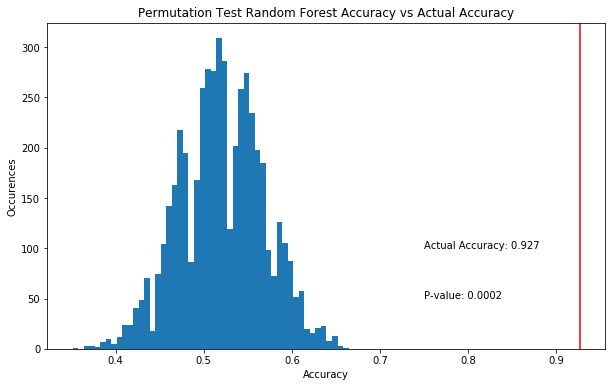

In [30]:
histogram_plot('rf_permutation_acc.csv', 'Random Forest', 'accuracy')

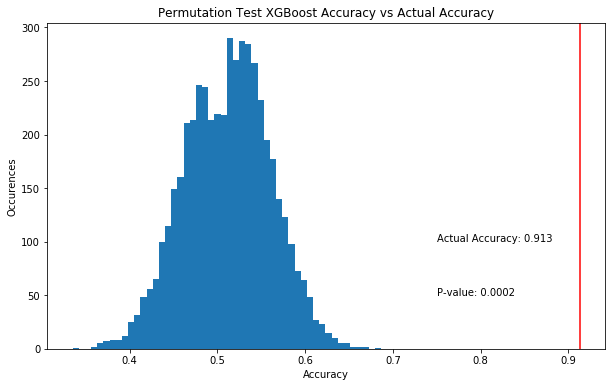

In [31]:
histogram_plot('xgb_permutation_acc.csv', 'XGBoost', 'accuracy')